<a href="https://colab.research.google.com/github/Lou1108/DeepLearning/blob/main/try_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, GRU, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.callbacks import EarlyStopping


Data Loading

In [3]:
data = loadmat('/content/drive/MyDrive/Deep Learning/Xtrain.mat')['Xtrain']
#As requested in point a) we scale the data, preparing it for the neural network.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

Converting time series into supervised learning format. It uses a sliding window (time_step) for one-step-ahead prediction

In [4]:
def create_dataset(data, time_step): #supervised format
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [6]:
X, y = create_dataset(scaled_data, 100)
X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

Trying different time steps, as requested in point b) to tune for each of the different models the best performance and of all models the best one.

In [14]:
time_steps=list(range(25, 151, 25))
results_RNN = []
print("RNN")
for ts in time_steps:
    X, y = create_dataset(scaled_data, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential()
    model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(SimpleRNN(units=100))
    model.add(Dense(units=1))
    early_stop = EarlyStopping(monitor='loss', patience=5)
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_RNN.append([ts, mse, rmse, mae])

results_LSTM=[]
print("LSTM")
for ts in time_steps:
    X, y = create_dataset(scaled_data, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model2 = Sequential()
    model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model2.add(LSTM(units=50))
    model2.add(Dense(units=1))

    early_stop = EarlyStopping(monitor='loss', patience=5)
    model2.compile(optimizer='adam', loss='mean_squared_error')
    model2.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

    predictions = model2.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_LSTM.append([ts, mse, rmse, mae])

results_GRU = []
print("GRU")
for ts in time_steps:
  X, y = create_dataset(scaled_data, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])


df_rnn = pd.DataFrame(results_RNN, columns=["time_step", "MSE", "RMSE", "MAE"])
df_lstm = pd.DataFrame(results_LSTM, columns=["time_step", "MSE", "RMSE", "MAE"])
df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("RNN results:\n", df_rnn)
print("\nLSTM results:\n", df_lstm)
print("\nGRU results:\n", df_gru)

RNN
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1745
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0125
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1491
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0105
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0078
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0071
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0080
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0070
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0056
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1115
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0132
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0106
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0082
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0071
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0069
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0072
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1673
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0147
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0078
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0103
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0083
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0073
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0070
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0071
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0069
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0063
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0076
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0050
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0054
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1188
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0186
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0099
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0070
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0075
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0077
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0048
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0048
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0050
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0060
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0056
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0055
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0052
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0063
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0037
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.1021
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0109
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0138
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0084
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0133
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0082
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0074
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0072
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0085
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0062
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0102
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0078
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0094
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0090
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
LSTM
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0471
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0316
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0367
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0362
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0325
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0270
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0165
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0148
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0477
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0364
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0352
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0346
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0340
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0249
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0144
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0145
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0134
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0143
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0116
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0137
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0114
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0482
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0352
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0338
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0315
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0343
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0298
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0202
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0160
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0140
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0149
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0119
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0117
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0143
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0132
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0119
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0562
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0372
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0344
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0386
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0328
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0281
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0268
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0228
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0152
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0124
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0142
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0135
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0153
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0141
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0098
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0568
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0358
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0357
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0327
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0301
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0301
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0223
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0166
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0176
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0120
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0136
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0149
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0106
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0135
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0117
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0484
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0357
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0371
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0321
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0293
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0309
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0270
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0219
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0183
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0164
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0122
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0130
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0137
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0109
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0148
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0557
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0368
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0283
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0185
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0122
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0133
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0106
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0096
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0091
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0084
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0079
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0051
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0052
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0034
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0582
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0384
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0288
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0156
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0131
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0120
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0101
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0102
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0085
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0079
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0081
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0047
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0039
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0029
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0034
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0520
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0346
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0275
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0172
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0140
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0136
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0113
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0126
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0101
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0095
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0082
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0076
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0062
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0051
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0046
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0521
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0362
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0294
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0149
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0124
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0115
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0115
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0107
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0078
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0102
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0058
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0043
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0047
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0046
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0038
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0533
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0353
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0268
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0155
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0128
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0136
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0111
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0106
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0088
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0091
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0060
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0043
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0044
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0039
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0589
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0359
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0261
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0188
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0133
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0131
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0108
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0106
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0112
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0109
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0094
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0073
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0059
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0036
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step -

In [15]:
time_steps=list(range(100, 201, 25))
results_GRU = []
print("GRU")
for ts in time_steps:
  X, y = create_dataset(scaled_data, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])


df_rnn = pd.DataFrame(results_RNN, columns=["time_step", "MSE", "RMSE", "MAE"])
df_lstm = pd.DataFrame(results_LSTM, columns=["time_step", "MSE", "RMSE", "MAE"])
df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("RNN results:\n", df_rnn)
print("\nLSTM results:\n", df_lstm)
print("\nGRU results:\n", df_gru)

GRU
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0559
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0355
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0272
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0150
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0150
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0114
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0119
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0117
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0097
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0092
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0077
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0046
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0055
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0049
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0035
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0622
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0394
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0341
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0233
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0151
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0142
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0107
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0104
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0092
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0101
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0105
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0077
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0054
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0049
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0043
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0532
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0328
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0294
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0189
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0115
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0122
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0106
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0121
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0104
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0091
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0066
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0071
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0048
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0055
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0477
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0329
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0238
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0188
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0135
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0096
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0109
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0097
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0113
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0096
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0091
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0080
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0073
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0059
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0498
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0318
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0265
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0187
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0122
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0102
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0099
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0086
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0083
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0096
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0083
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0073
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0070
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0071
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step -

# GRU

In [16]:
X, y = create_dataset(scaled_data, 125) #with the best fine tuned time step = 125
X = X.reshape(X.shape[0], X.shape[1], 1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0409
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0304
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0219
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0124
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0106
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0103
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0120
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0091
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0089
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0110
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0079
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0072
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0078
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0061
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step -

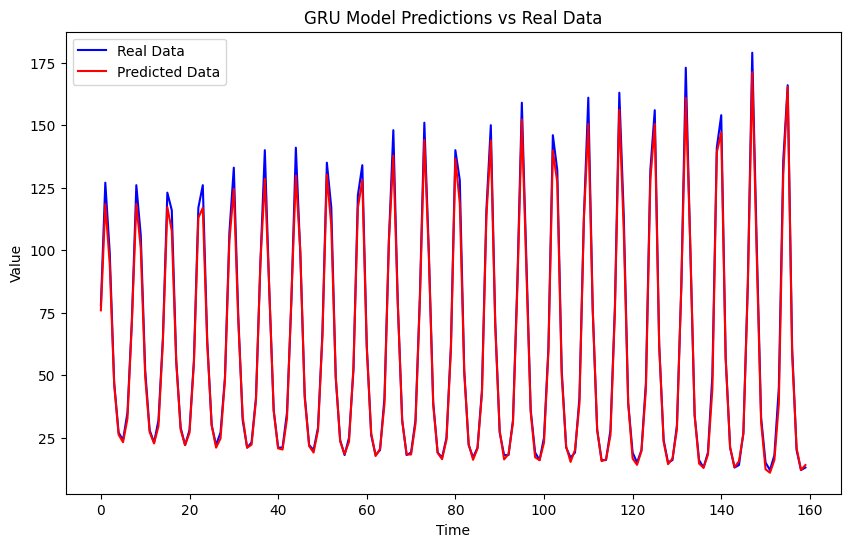

In [19]:
# Define and compile the model
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=5)
model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

# Make predictions
predictions = model_GRU.predict(X_test)

# Inverse transform to get original scale
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)

# Print the errors
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, color='blue', label='Real Data')
plt.plot(predictions_inv, color='red', label='Predicted Data')
plt.title('GRU Model Predictions vs Real Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

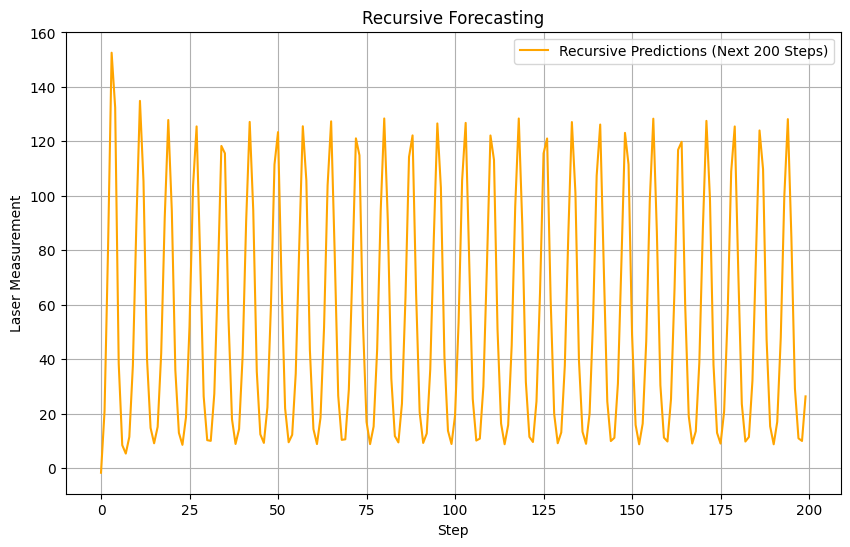

In [20]:
last_input = X_test[-1].reshape(1, X_test.shape[1], 1)
recursive_preds = []

for _ in range(200):
    next_pred = model2.predict(last_input)[0, 0]
    recursive_preds.append(next_pred)

    # Slide the window forward: drop first value, add new prediction
    last_input = np.append(last_input[:, 1:, :], [[[next_pred]]], axis=1)

#actual values
recursive_preds_scaled = scaler.inverse_transform(np.array(recursive_preds).reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(recursive_preds_scaled, label='Recursive Predictions (Next 200 Steps)', color='orange')
plt.title('Recursive Forecasting')
plt.xlabel('Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.show()

plot to show the last 150 known values from the test set (in blue) followed by the 200 recursively predicted future steps (in orange).

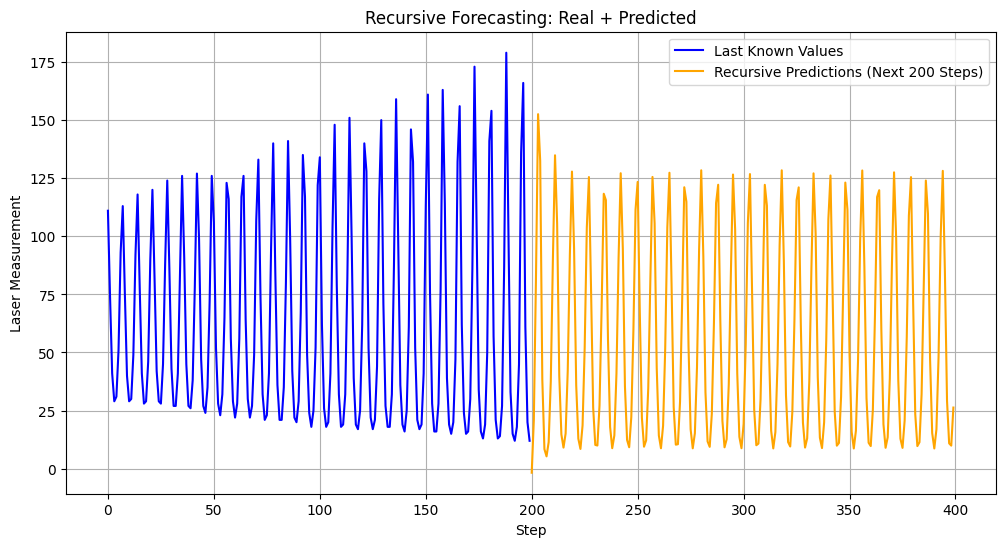

In [21]:
true_window = scaler.inverse_transform(X_test[-1].reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(true_window)), true_window, label="Last Known Values", color='blue')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         recursive_preds_scaled, label="Recursive Predictions (Next 200 Steps)", color='orange')
plt.xlabel("Step")
plt.ylabel("Laser Measurement")
plt.title("Recursive Forecasting: Real + Predicted")
plt.legend()
plt.grid(True)
plt.show()